In [1]:
import wave
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

plt.rc('font', **font)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 


In [2]:
file=wave.open('sig100.wav')

In [3]:
#no of channels in the file
#channel=no of sources from which the audio comes from- mono= from a single input
#stereo= from 2 sources (equivalent to sound from left and right headphones)
print("The no of channels is:",file.getnchannels())

The no of channels is: 2


In [4]:
#Frequency of the sample
#this gives the no of frames per second
s_rate=file.getframerate()
print("Sampling frequency",s_rate)

Sampling frequency 360


In [5]:
#no of bytes in every sample
print("No of bytes in a sample:",file.getsampwidth())

No of bytes in a sample: 2


In [6]:
#to find the total number of frames in the sample
n_frames=file.getnframes()
print(n_frames)

650000


In [7]:
#to read frames of the wave file
data=file.readframes(10000) # to read n frames
print(data)

b'`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe`\xfc`\xfe\x00\xfd\x00\xfe\xa0\xfc\x00\xfe`\xfc\xe0\xfd@\xfc\xe0\xfd\x00\xfc \xfe \xfc@\xfe\x00\xfc@\xfe\xa0\xfb`\xfe\x80\xfb\xa0\xfe`\xfb\xc0\xfe\xc0\xfb\xc0\xfe \xfc\x00\xff\xa0\xfb\x00\xff\x80\xfb\xa0\xfe@\xfb \xfe\x80\xfb\x00\xfe \xfc\xe0\xfd\xa0\xfc@\xfe \xfc\x00\xfe@\xfb\x00\xfe\xe0\xfa\xc0\xfd \xfa\xa0\xfd`\xfa\xc0\xfd\xe0\xf9\xa0\xfd\xc0\xf9@\xfd\x80\xf9\x00\xfd \xf9`\xfc \xf9\xa0\xfc \xf9`\xfd`\xf9\xa0\xfd\xa0\xf9`\xfd`\xf9\x00\xfd \xf9\xa0\xfc\xc0\xf8\xe0\xfc\xc0\xf8\xe0\xfc\xc0\xf8 \xfd\xc0\xf8 \xfd\xe0\xf8\xe0\xfc\xa0\xf8\x80\xfc`\xf8\x80\xfc\xe0\xf8\xc0\xfc \xf9\xe0\xfc \xf9\x80\xfc\x00\xf9`\xfc\xe0\xf8@\xfc`\xf8@\xfc\xc0\xf8\xc0\xfc\x80\xf8 \xfd\x00\xf9\xe0\xfc\xc0\xf8\xa0\xfc\x80\xf8\x00\xfc \xf8 \xfb\x00\xf8\x00\xfb\xa0\xf7\xe0\xfa\x00\xf7`\xfa`\xf6\xa0\xf9`\xf6\x80\xf8\xe0\xf5\xc0\xf8\xa0\xf4 \xfa\xe0\xf3\xc0\xfc\xe0\xf3 \xff`\xf5@\x01\xc0\xf7\x00\x03\x80\xfa\x00\x05@\xfe\xc0\x07\x00\x03\xe0\n`\t`\

In [8]:
#The above o/p shows binary data
#There are 2 channels, and 2 bytes per channel= 4 bytes in all in a frame
#First two bytes= from 1st channel, next 2 bytes= from the next channel

In [9]:
#To decode the binary data
import numpy as np
op=np.frombuffer(data,np.int16)
print(op)

[ -928  -416  -928 ...   288  4608 -1664]


In [10]:
op.shape=-1,2
#-1 stands for all the rows, 2 for the number of columnns
print(op)
temp=op[:]

[[ -928  -416]
 [ -928  -416]
 [ -928  -416]
 ...
 [ 4544  2048]
 [ 5088   288]
 [ 4608 -1664]]


In [11]:
#in the above o/p, the first column= from the first channel
#second column= from the second column


In [12]:
#taking the transpose, so that each row= from one channel
op=op.T
print(op)
#new_op=(op[0:30])
#print(new_op)

[[ -928  -928  -928 ...  4544  5088  4608]
 [ -416  -416  -416 ...  2048   288 -1664]]


In [13]:
#to make the time sequence
#1. Find the total duration of the file
#duration= n_frames/sampling_rate (sampling rate= no of samples per sec )
duration=10000/s_rate
print(duration)

#time difference between each sample
diff=1/s_rate

27.77777777777778


In [14]:
#to generate a time sequence
t_seq=np.arange(0,duration,diff)
#the arrange function's params are initial and final val, and the step val


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


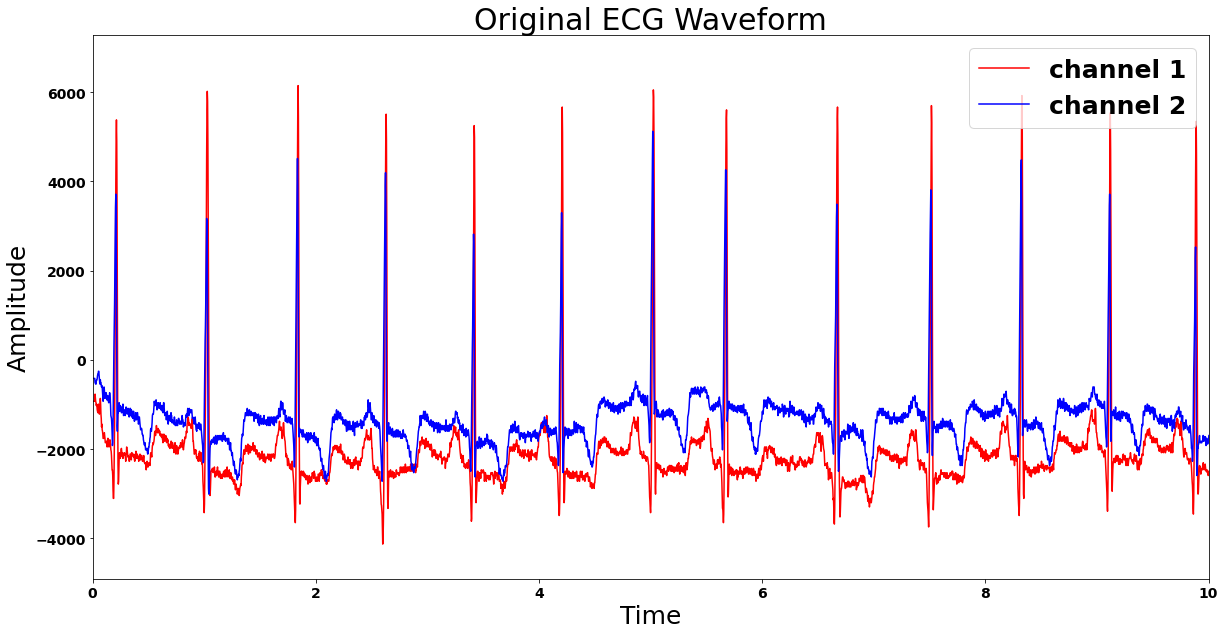

In [15]:
#to plot the first channel
plt.figure(figsize=(20,10))
plt.xlim(0,10)


plt.plot(t_seq,op[0],color='r', label='channel 1')
plt.plot(t_seq,op[1],color='b', label='channel 2')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original ECG Waveform")
plt.legend()
plt.savefig('channel1.png')

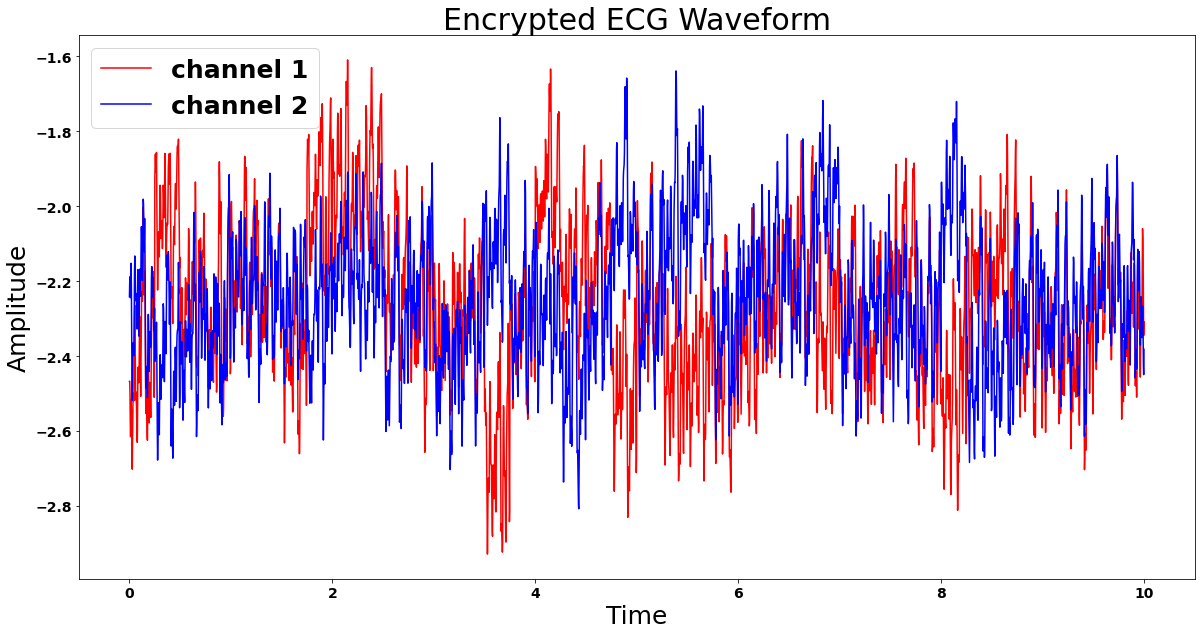

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
#plt.xlim(0,10)
header=["Val 1", "Val 2"]
enc_file=pd.read_csv("plot_a.csv",names=header)
enc_file
time=pd.read_csv("time_enc.csv")
time=[float(i) for i in list(time)]

plt.plot(time,enc_file['Val 1'],color='r', label='channel 1')
plt.plot(time,enc_file['Val 2'],color='b', label='channel 2')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Encrypted ECG Waveform")
plt.legend()
plt.savefig("EncryptedEcg.png")

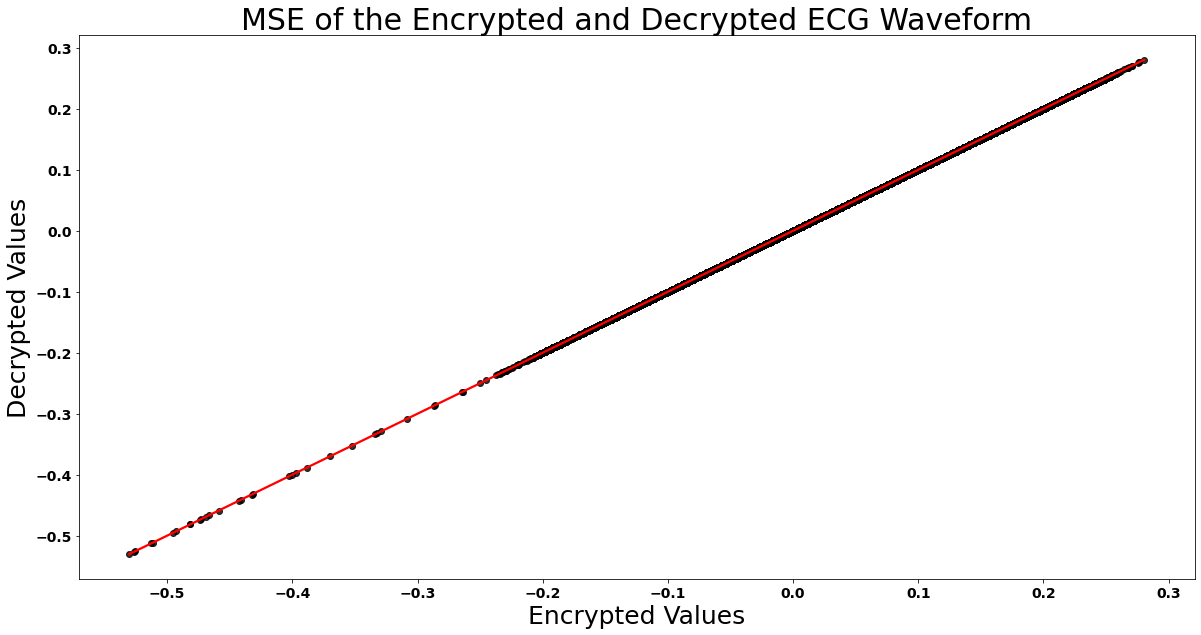

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(20,10))
#plt.xlim(0,10)
header=["Val 1"]
header2=["Val 2"]
og_values=pd.read_csv("OriginalWave.csv",names=header)
dec_values=pd.read_csv("DecryptedValues.csv", names=header2)
#time=[float(i) for i in list(time)]


#og=np.array(og_values)
#dec=np.array(enc_values)
diff=dec_values["Val 2"][0:1000]- og_values["Val 1"][0:1000]
og_values["Val 2"]=dec_values

sns.regplot(data=og_values, x='Val 1',y="Val 2", ci=None,marker="o",scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("Encrypted Values")
plt.ylabel("Decrypted Values")
plt.title ("MSE of the Encrypted and Decrypted ECG Waveform")
plt.show()
#og_values

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(og_values["Val 1"],og_values["Val 2"])


1.0797043921023464e-23

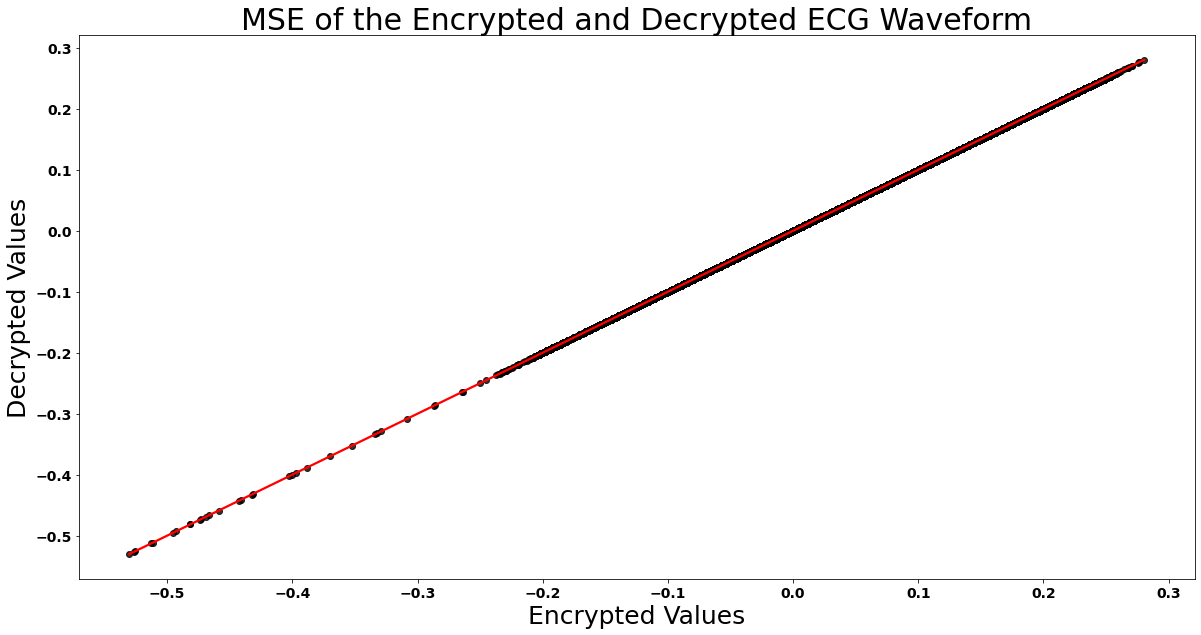

,Val 1,Val 2
0,-0.028320,-2.832031e-02
1,-0.028320,-2.832031e-02
2,-0.028320,-2.832031e-02
3,-0.028320,-2.832031e-02
4,-0.028320,-2.832031e-02
...,...,...
1299995,-0.093750,-9.375000e-02
1299996,-0.080078,-8.007812e-02
1299997,-0.071289,-7.128906e-02
1299998,-0.065430,-6.542969e-02


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(20,10))
#plt.xlim(0,10)
header=["Val 1"]
header2=["Val 2"]
og_values=pd.read_csv("OriginalWave.csv",names=header)
dec_values=pd.read_csv("DecryptedValues.csv", names=header2)
#time=[float(i) for i in list(time)]


#og=np.array(og_values)
#dec=np.array(enc_values)
diff=dec_values["Val 2"][0:1000]- og_values["Val 1"][0:1000]
og_values["Val 2"]=dec_values

sns.regplot(data=og_values, x='Val 1',y="Val 2", ci=None,marker="o",scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("Encrypted Values")
plt.ylabel("Decrypted Values")
plt.title ("MSE of the Encrypted and Decrypted ECG Waveform")
plt.show()
og_values

In [20]:
time

[0.0,
 0.00277777777777778,
 0.00555555555555556,
 0.00833333333333333,
 0.0111111111111111,
 0.0138888888888889,
 0.0166666666666667,
 0.0194444444444444,
 0.0222222222222222,
 0.025,
 0.0277777777777778,
 0.0305555555555556,
 0.0333333333333333,
 0.0361111111111111,
 0.0388888888888889,
 0.0416666666666667,
 0.0444444444444444,
 0.0472222222222222,
 0.05,
 0.0527777777777778,
 0.0555555555555556,
 0.0583333333333333,
 0.0611111111111111,
 0.0638888888888889,
 0.0666666666666667,
 0.0694444444444444,
 0.0722222222222222,
 0.075,
 0.0777777777777778,
 0.0805555555555556,
 0.0833333333333333,
 0.0861111111111111,
 0.0888888888888889,
 0.0916666666666667,
 0.0944444444444444,
 0.0972222222222222,
 0.1,
 0.102777777777778,
 0.105555555555556,
 0.108333333333333,
 0.111111111111111,
 0.113888888888889,
 0.116666666666667,
 0.119444444444444,
 0.122222222222222,
 0.125,
 0.127777777777778,
 0.130555555555556,
 0.133333333333333,
 0.136111111111111,
 0.138888888888889,
 0.141666666666667,
 0

Text(0, 0.5, 'Amplitude')

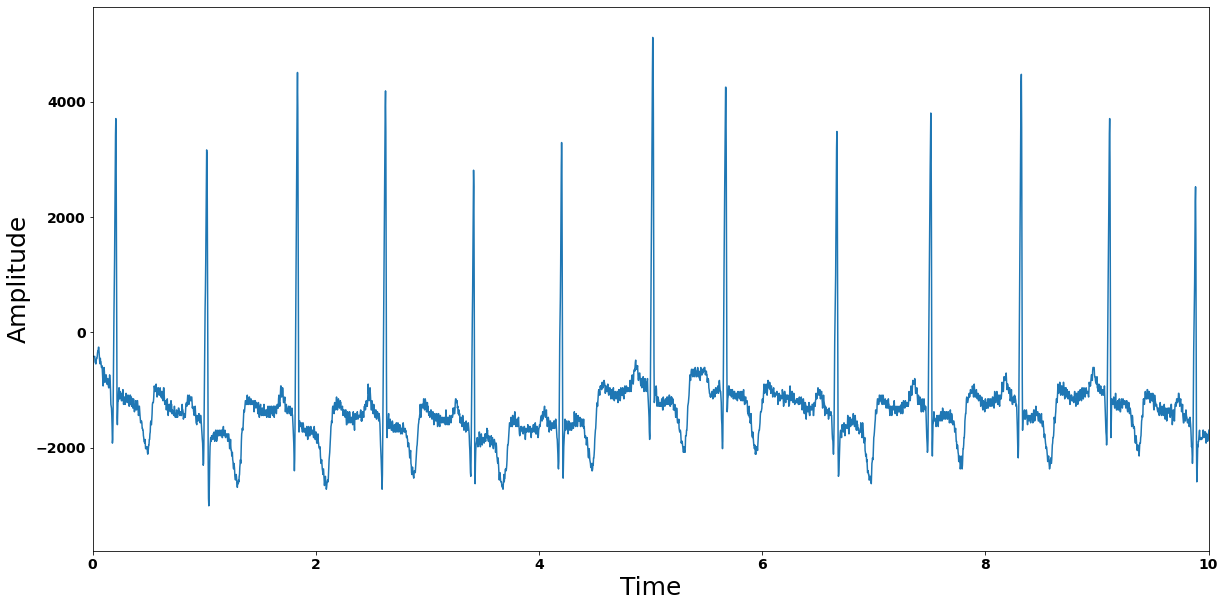

In [21]:
#to plot the second channel
plt.figure(figsize=(20,10))
plt.xlim(0,10)
plt.plot(t_seq,op[1])
plt.xlabel("Time")
plt.ylabel("Amplitude")

In [22]:
op.shape

(2, 10000)

In [23]:
temp=op.ravel()

In [24]:
temp.shape

(20000,)

In [25]:
a=np.array([temp])

In [26]:
a.shape

(1, 20000)

In [27]:
new=a.T

In [28]:
new.shape

(20000, 1)

In [29]:
new

array([[ -928],
       [ -928],
       [ -928],
       ...,
       [ 2048],
       [  288],
       [-1664]], dtype=int16)

In [30]:
def squarify(M,val):
    (a,b)=M.shape
    if a>b:
        padding=((0,0),(0,a-b))
    else:
        padding=((0,b-a),(0,0))
    return np.pad(M,padding,mode='constant',constant_values=val)

In [31]:
#trying to square the matrix, channel wise

In [32]:
#c1=np.array([op[1].copy()])

In [33]:
#c1_t=c1.T

In [34]:
#c1_t.shape

In [35]:
#square=squarify(c1_t,0)

In [36]:
#square.shape

In [37]:
square=squarify(new,0)

In [38]:
square.shape

(20000, 20000)

In [39]:
square

array([[ -928,     0,     0, ...,     0,     0,     0],
       [ -928,     0,     0, ...,     0,     0,     0],
       [ -928,     0,     0, ...,     0,     0,     0],
       ...,
       [ 2048,     0,     0, ...,     0,     0,     0],
       [  288,     0,     0, ...,     0,     0,     0],
       [-1664,     0,     0, ...,     0,     0,     0]], dtype=int16)

In [40]:
key=np.random.randn(20000,20000)



In [41]:
key.shape

(20000, 20000)

In [42]:
key

array([[ 0.83146485, -0.6310373 ,  0.59080698, ..., -0.50505829,
        -1.6261048 , -0.07016205],
       [-1.75774359,  0.1835631 ,  0.18449842, ...,  1.41314735,
         0.2944889 , -0.4796428 ],
       [-0.31945576,  1.06311904, -2.89810966, ...,  1.00016353,
        -1.01125074,  0.29963317],
       ...,
       [-0.85216815, -0.53969617, -0.30092828, ...,  1.27379349,
        -0.70309944, -0.05023485],
       [-1.03618699,  0.41241309, -0.05822262, ...,  1.31528272,
         1.29189041, -0.64759491],
       [ 1.15405147, -0.82194274,  1.1705579 , ..., -0.54168682,
        -0.43970539,  0.28281463]])

In [43]:
#encrypted matrix
enc=square*key

In [44]:
enc.shape

(20000, 20000)

In [45]:
enc

array([[ -771.59938291,    -0.        ,     0.        , ...,
           -0.        ,    -0.        ,    -0.        ],
       [ 1631.18605456,     0.        ,     0.        , ...,
            0.        ,     0.        ,    -0.        ],
       [  296.45494781,     0.        ,    -0.        , ...,
            0.        ,    -0.        ,     0.        ],
       ...,
       [-1745.24036975,    -0.        ,    -0.        , ...,
            0.        ,    -0.        ,    -0.        ],
       [ -298.42185398,     0.        ,    -0.        , ...,
            0.        ,     0.        ,    -0.        ],
       [-1920.34164667,    -0.        ,     0.        , ...,
           -0.        ,    -0.        ,     0.        ]])

In [46]:
#var=np.linalg.inv(key)

In [47]:
#np.linalg.det(key)

In [48]:
var

NameError: name 'var' is not defined